In [3]:
import pandas as pd
import os
from clustering import perform_clustering

# Set directories
project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
data_dir = os.path.join(project_dir, 'data')
fs_data_dir = os.path.join(data_dir, 'FS_TCG', 'data')
clustering_dir = os.path.join(project_dir, 'FS_TCG', 'clustering')

# Clustering parameters
basin = 'GLB'
n_clusters = 18
norm = False
seasonal_soothing = False
train_yearI, train_yearF = 1980, 2014
test_yearI, test_yearF = 2014, 2021
res = 2.5
resolution = f'{res}x{res}'

# Load dataframe containing information of variables to be clustered
df_cluster_vars = pd.read_csv(os.path.join(clustering_dir, 'vars_dict.csv'))

Data is a 2D numpy array
Please, be sure the data is in the correct format: (n_samples (nodes), n_features (variables (time))


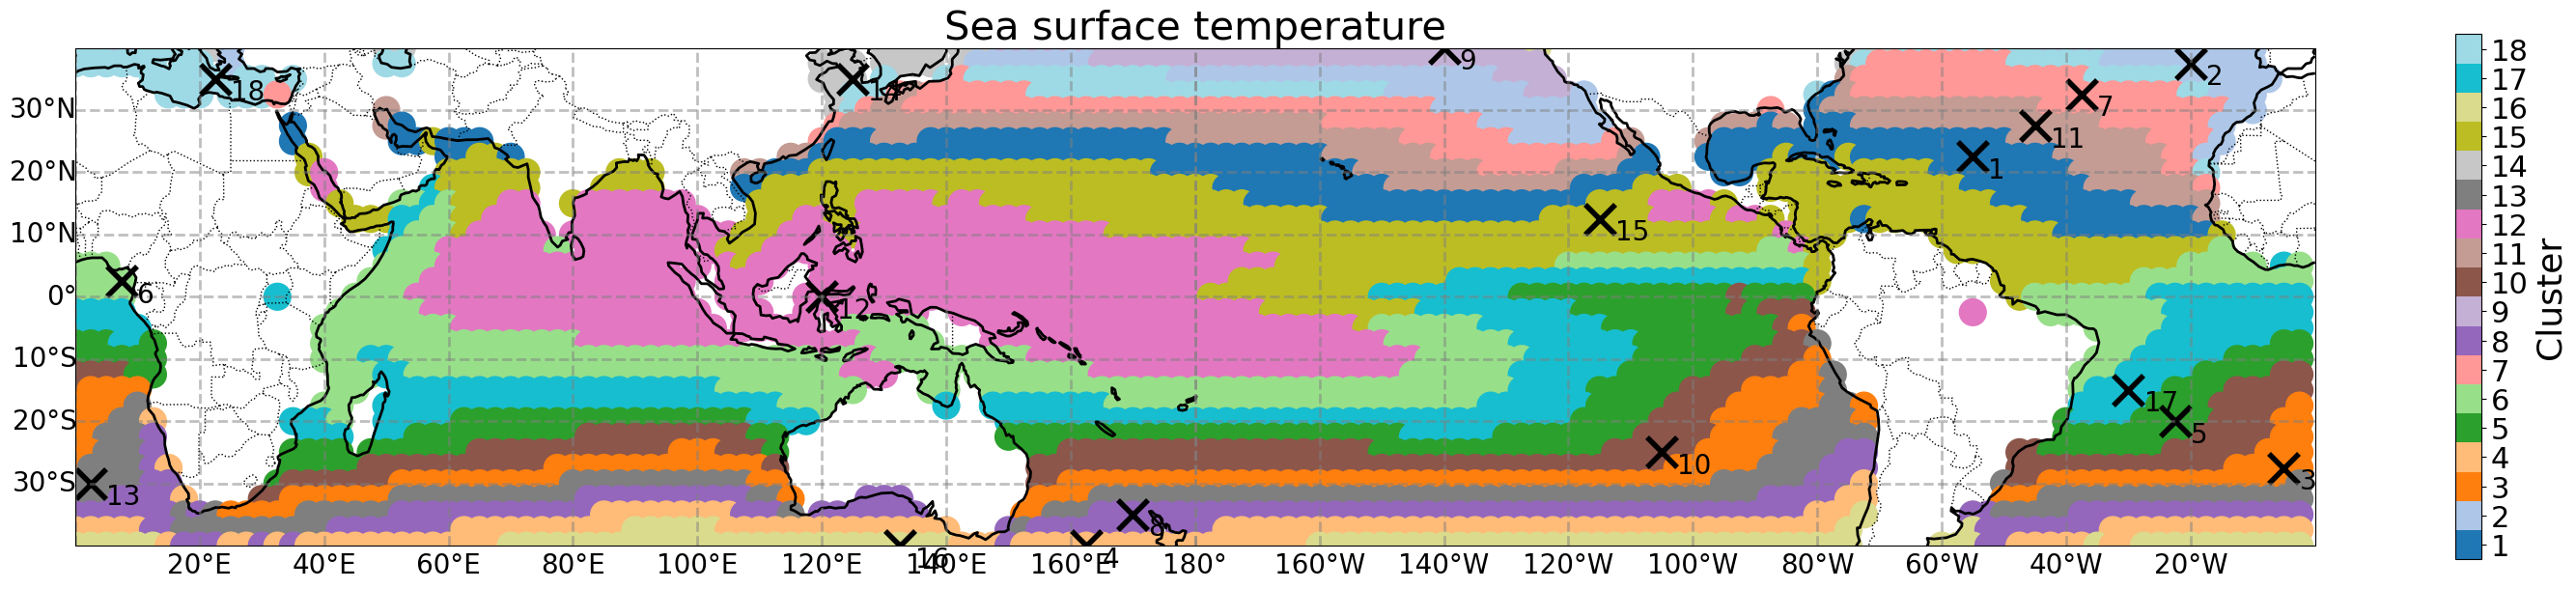

In [4]:
# Perform clustering for variable at row N
N = 1
vars_info = df_cluster_vars.iloc[N]

var = vars_info['var']
dataset = vars_info['dataset']
vars_group = vars_info['vars_group']
level = vars_info['level']
if dataset == 'ERA5':
    path_predictor = os.path.join(data_dir, dataset, resolution, vars_group, dataset + '_' + vars_group)
else:
    path_predictor = os.path.join(data_dir, dataset, resolution, vars_group, vars_group)

path_output = os.path.join(fs_data_dir, f'{n_clusters}clusters')
os.makedirs(path_output, exist_ok=True)

# Clusters
months = None
centroids, centroids_dataframe, clusters_av_dataframe, labels_dataframe = perform_clustering(var, level, months, basin, n_clusters, norm, 
                                                                                             seasonal_soothing, train_yearI, train_yearF, 
                                                                                             test_yearI, test_yearF, resolution, path_predictor, 
                                                                                             path_output)